# import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# loading dataset

In [2]:
df = pd.read_csv('BigMart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
# statustical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


# Data Preprocessing

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
# all the categorical data
feature_cat = [feature for feature in df.columns if df[feature].dtypes == 'O']
feature_cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
feature_cat.remove('Outlet_Identifier')

In [10]:
df[feature_cat].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,High,Tier 3,Supermarket Type1


In [11]:
for x in feature_cat:
    print(df[x].value_counts())

FDW13    10
FDG33    10
DRN47     9
FDD38     9
FDV60     9
FDU12     9
FDX04     9
FDX20     9
FDP25     9
FDQ40     9
NCI54     9
FDG09     9
FDT07     9
NCJ30     9
FDF52     9
FDW26     9
FDV38     9
NCL31     9
FDF56     9
NCY18     9
FDW49     9
FDX31     9
FDO19     9
NCQ06     9
DRE49     9
NCB18     9
NCF42     9
NCK05     8
FDG38     8
FDY56     8
         ..
FDB10     2
FDU43     2
DRC24     2
FDP15     2
NCV18     2
DRE01     2
NCW30     2
FDA48     2
FDM38     2
DRL59     2
FDR57     2
FDD48     2
FDD22     2
NCW05     2
FDE38     2
FDH22     2
FDE39     2
NCS41     2
FDI36     2
NCG19     2
NCM42     2
FDQ60     1
FDO33     1
FDC23     1
FDY43     1
FDN52     1
FDT35     1
DRF48     1
FDK57     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Food

In [12]:
# item_weight_mean = df.pivot_table(values='Item_Weight', index='Item_Identifier')

In [13]:
# miss_val_num = df['Item_Weight'].isnull()

In [14]:
# for i, item in enumerate(df['Item_Identifier']):
#     if miss_val_num[i]:
#         if item in item_weight_mean:
#             df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
#         else:
#             df['Item_Weight'][i] = 0
print(np.round(df['Item_Weight'].isnull().mean(),4), '% missing values')
print(np.round(df['Outlet_Size'].isnull().mean(),4), '% missing values')

(0.1717, '% missing values')
(0.2828, '% missing values')


In [15]:
 median_value = df['Item_Weight'].median()

In [16]:
df['Item_Weight'].fillna(median_value,inplace=True)

In [17]:
df['Item_Weight'].isnull().sum()

0

In [18]:
df['Outlet_Size'] =df['Outlet_Size'].fillna('Missing')

In [19]:
df['Outlet_Size'].isnull().sum()

0

In [20]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [23]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
# creation of new attribute
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])

In [25]:
df['New_Item_Type'].head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: New_Item_Type, dtype: object

In [26]:
df['New_Item_Type'] = df['New_Item_Type'].replace({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [27]:
df['Outlet_Number_of_Establishment_year'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Number_of_Establishment_year'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Number_of_Establishment_year, dtype: int64

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Number_of_Establishment_year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


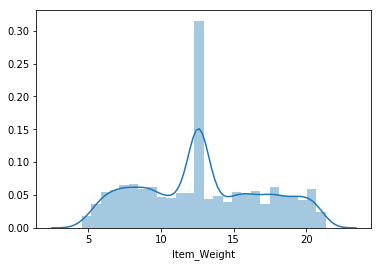

In [29]:
sns.distplot(df['Item_Weight'])

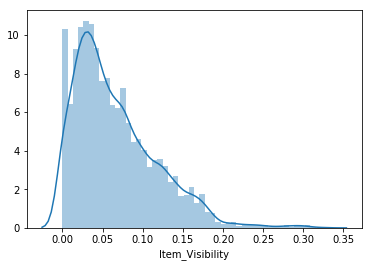

In [30]:
sns.distplot(df['Item_Visibility'])

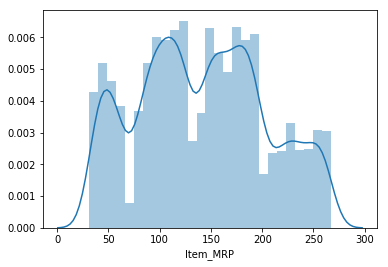

In [31]:
sns.distplot(df['Item_MRP'])

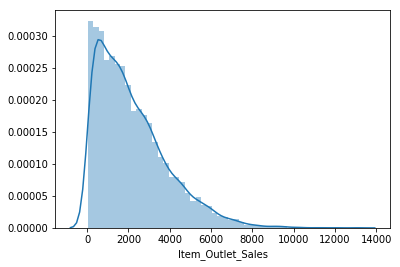

In [32]:
sns.distplot(df['Item_Outlet_Sales'])

In [33]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

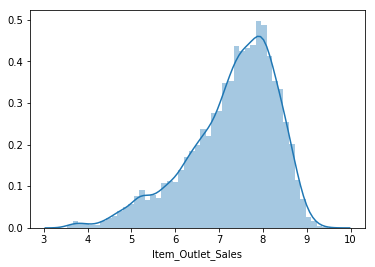

In [34]:
sns.distplot(df['Item_Outlet_Sales'])

In [35]:
feature_cat = [feature for feature in df.columns if df[feature].dtypes =='O']
feature_cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'New_Item_Type']

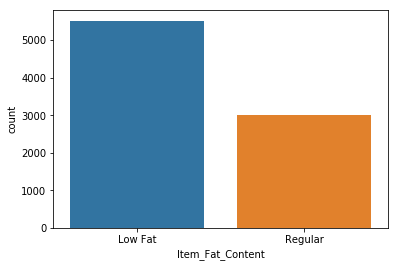

In [36]:
sns.countplot(df['Item_Fat_Content'])

[Text(0,0,'Dairy'),
 Text(0,0,'Soft Drinks'),
 Text(0,0,'Meat'),
 Text(0,0,'Fruits and Vegetables'),
 Text(0,0,'Household'),
 Text(0,0,'Baking Goods'),
 Text(0,0,'Snack Foods'),
 Text(0,0,'Frozen Foods'),
 Text(0,0,'Breakfast'),
 Text(0,0,'Health and Hygiene'),
 Text(0,0,'Hard Drinks'),
 Text(0,0,'Canned'),
 Text(0,0,'Breads'),
 Text(0,0,'Starchy Foods'),
 Text(0,0,'Others'),
 Text(0,0,'Seafood')]

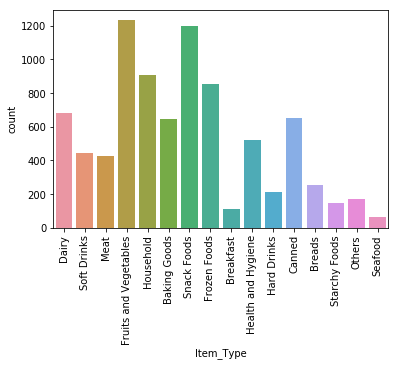

In [37]:
l = list(df['Item_Type'].unique())
chart = sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels=l,rotation=90)

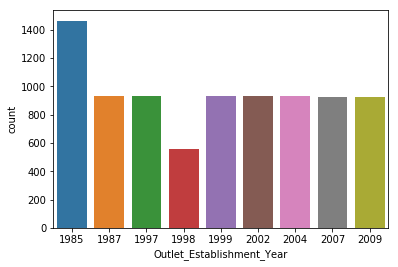

In [38]:
sns.countplot(df['Outlet_Establishment_Year'])

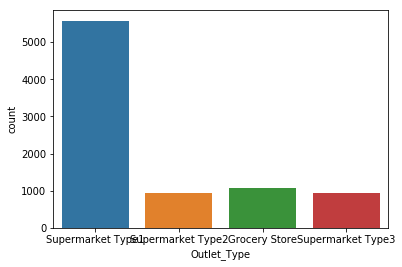

In [39]:
sns.countplot(df['Outlet_Type'])

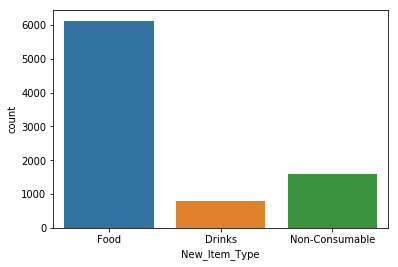

In [40]:
sns.countplot(df['New_Item_Type'])

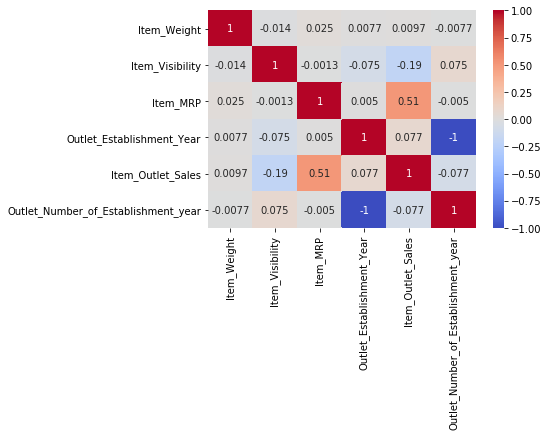

In [41]:
# Correlation
cor = df.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [47]:
# take all categorical feature
# feature_cat
len(df['Item_Type'].unique())

16

In [49]:
Item_fat = pd.get_dummies(df['Item_Fat_Content'],drop_first=True)
Outlet_size = pd.get_dummies(df['Outlet_Size'],drop_first=True)
New_item_type = pd.get_dummies(df['New_Item_Type'],drop_first=True)
Outlet_type = pd.get_dummies(df['Outlet_Type'],drop_first=True)
Outlet_location_type = pd.get_dummies(df['Outlet_Location_Type'],drop_first=True)

In [52]:
df = pd.concat([df,Item_fat,Outlet_size,New_item_type,Outlet_type,Outlet_location_type],axis=1)

In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Medium,Missing,Small,Food,Non-Consumable,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,1,0,0,1,0,1,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,1,0,0,0,0,0,1,0,0,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,1,0,0,1,0,1,0,0,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,...,0,1,0,1,0,0,0,0,0,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0,0,0,0,1,1,0,0,0,1


In [54]:
df.drop(['Item_Fat_Content','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)

In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Number_of_Establishment_year,...,Medium,Missing,Small,Food,Non-Consumable,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,Supermarket Type1,8.225808,Food,14,...,1,0,0,1,0,1,0,0,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,Supermarket Type2,6.096776,Drinks,4,...,1,0,0,0,0,0,1,0,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,Supermarket Type1,7.648868,Food,14,...,1,0,0,1,0,1,0,0,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,Grocery Store,6.597664,Food,15,...,0,1,0,1,0,0,0,0,0,1
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,Supermarket Type1,6.903451,Non-Consumable,26,...,0,0,0,0,1,1,0,0,0,1


In [56]:
df.drop(['Outlet_Type','New_Item_Type'],axis=1,inplace=True)

In [57]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Number_of_Establishment_year,Regular,Medium,Missing,Small,Food,Non-Consumable,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,8.225808,14,0,1,0,0,1,0,1,0,0,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,6.096776,4,1,1,0,0,0,0,0,1,0,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,7.648868,14,0,1,0,0,1,0,1,0,0,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,6.597664,15,1,0,1,0,1,0,0,0,0,0,1
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,6.903451,26,0,0,0,0,0,1,1,0,0,0,1


In [58]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()

In [59]:
df['item_type'] = L.fit_transform(df['Item_Type'])

In [60]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Number_of_Establishment_year,Regular,Medium,Missing,Small,Food,Non-Consumable,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3,item_type
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,8.225808,14,0,1,0,0,1,0,1,0,0,0,0,4
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,6.096776,4,1,1,0,0,0,0,0,1,0,0,1,14
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,7.648868,14,0,1,0,0,1,0,1,0,0,0,0,10
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,6.597664,15,1,0,1,0,1,0,0,0,0,0,1,6
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,6.903451,26,0,0,0,0,0,1,1,0,0,0,1,9


In [62]:
df['Outlet'] = L.fit_transform(df['Outlet_Identifier'])

In [64]:
# train test split
X = df.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']

In [65]:
# model training
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
def model_build(model,X,y):
#     train the model
    model.fit(X,y)
#     predict the training set
    pred = model.predict(X)
#     perform cross validation
    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE",mean_squared_error(y,pred))
    print("cv score",cv_score)
    
    

Model Report
('MSE', 0.2879985357340875)
('cv score', 0.2895349030922294)


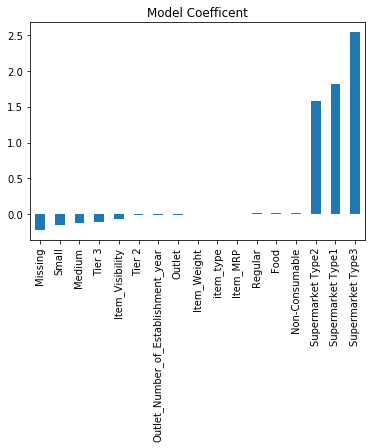

In [67]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression(normalize=True)
model_build(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title="Model Coefficent")

Model Report
('MSE', 0.5483585920903361)
('cv score', 0.5496880721802367)


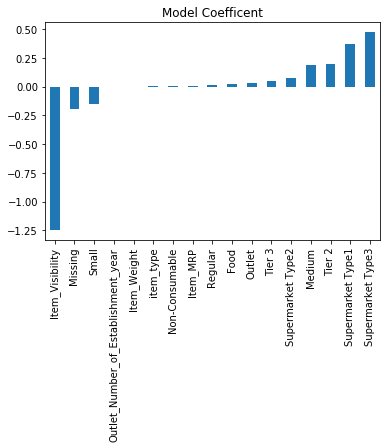

In [70]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = Ridge(normalize=True)
model_build(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title="Model Coefficent")

Model Report
('MSE', 0.7628688679102086)
('cv score', 0.7631830993560982)


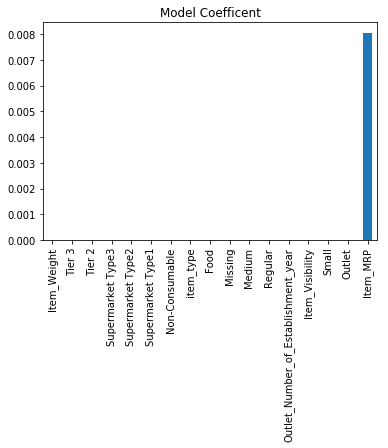

In [72]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = Lasso()
model_build(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title="Model Coefficent")

Model Report
('MSE', 2.5991699466113268e-11)
('cv score', 0.5871004735964523)


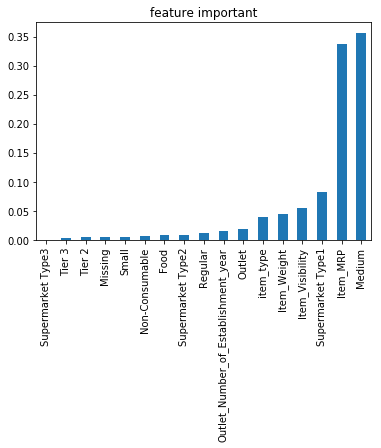

In [75]:
from sklearn.tree import ExtraTreeRegressor
model = ExtraTreeRegressor()
model_build(model,X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values()
coef.plot(kind='bar',title="feature important")

/home/shubham/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Report
('MSE', 0.05780652538433127)
('cv score', 0.33086875298529983)


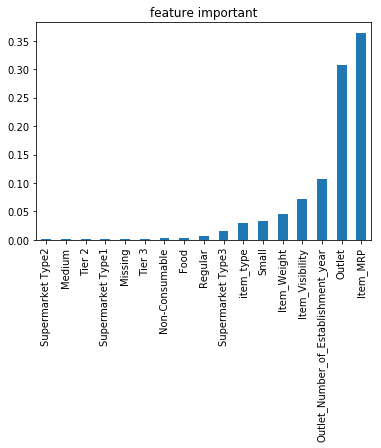

In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model_build(model,X,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values()
coef.plot(kind='bar',title="feature important")